### Setup

In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Thu Nov 10 09:42:46 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 13.6 gigabytes of available RAM

Not using a high-RAM runtime


In [3]:
from IPython.display import clear_output
!pip install --upgrade keras-cv
clear_output()

### Import Libraries

In [4]:
import time
import keras_cv
from tensorflow import keras
import matplotlib.pyplot as plt

### Run Inference

In [5]:
model = keras_cv.models.StableDiffusion(img_width=512, img_height=512)

1356917/1356917 [==============================] - 0s 0us/step
By using this model checkpoint, you acknowledge that its usage is subject to the terms of the CreativeML Open RAIL-M license at https://raw.githubusercontent.com/CompVis/stable-diffusion/main/LICENSE
198180272/198180272 [==============================] - 1s 0us/step


In [10]:
def plot_images(images):
    plt.figure(figsize=(8, 8))
    for i in range(len(images)):
        ax = plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i])
        plt.axis("off")

25/25 [==============================] - 29s 1s/step
CPU times: user 19.3 s, sys: 7.27 s, total: 26.5 s
Wall time: 29.7 s


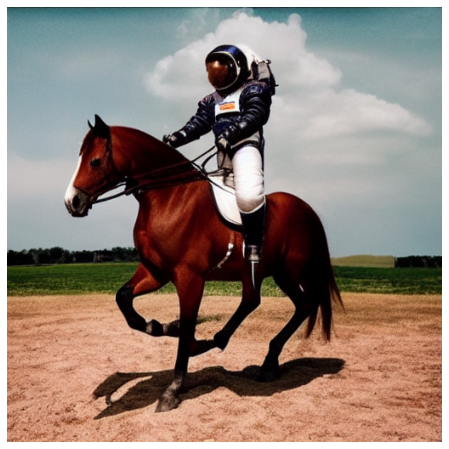

In [11]:
%%time

images = model.text_to_image("photograph of an astronaut riding a horse", batch_size=1)
plot_images(images)